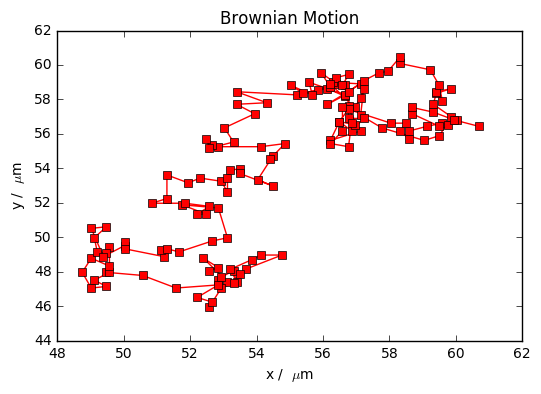

kb 4.27677843653e-24
del_kb 5.13660485055e-25
D 1.78171289526e-13
deld 1.4266101571e-14


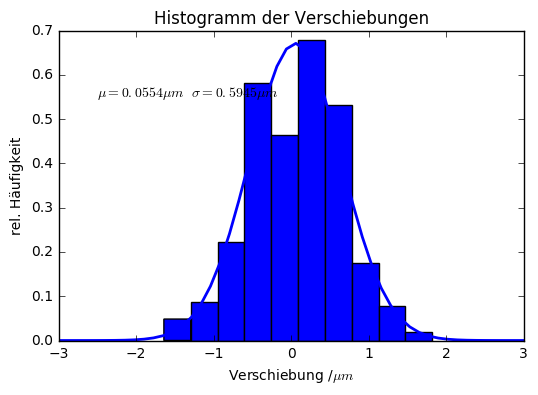

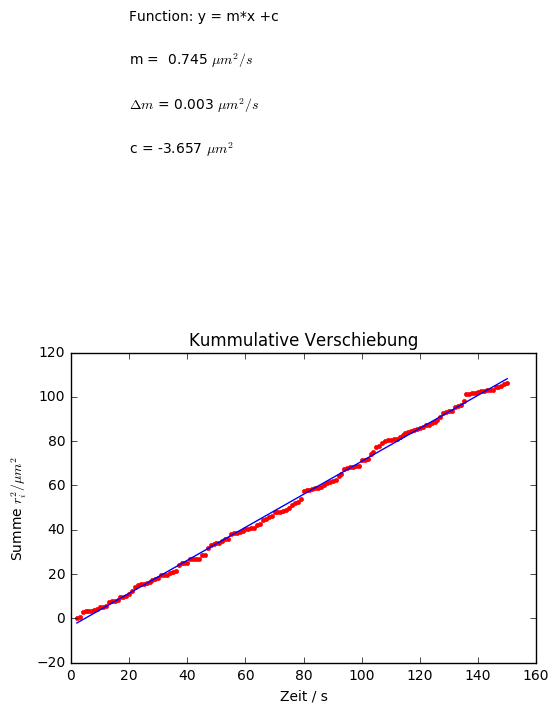

D3 =  1.86263941968e-13
del_D3 6.64495218866e-16
kp3 =  4.47103241285e-24
del_kb3 7.1883273682e-25


In [9]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

## put file "Messung.dat"into folder this py-file is saved at

##import data
def comma_to_float(valstr):
    return float(valstr. decode("utf-8"). replace(',', '.'))#if change of comma to dot does not work -- go to file and use STRG + H to replace manually

t,x,y= np.loadtxt('Messung.dat', skiprows=1, usecols= (1, 2, 3),
    converters= {1:comma_to_float,2:comma_to_float,3:comma_to_float}, unpack= True)

##visualize particlemotion
fig1 = plt.plot(x, y, marker= 's', color= 'red', linewidth=1)
fig1 = plt.xlabel('x / '+' $\mu$'+'m')
fig1 = plt.ylabel('y / '+' $\mu$'+'m')
fig1 = plt.title('Brownian Motion')
plt.savefig('brown1.pdf', format= 'PDF')
plt.show(fig1)##this is for testing puposes to show graph, it stops output until window of graph is closed

##calculating the'Verschiebungsquadrat'
dt= np. array([])
dx= np. array([])
dy= np. array([])
i=0
while i < len(t)-1:
    dt= np. append(dt,t[i+1]- t[i])
    dx= np. append(dx,x[i+1]- x[i])
    dy= np. append(dy,y[i+1]- y[i])
    i= i+ 1
r_squared= dx**2+dy**2

##calculation of mean displacement, Standarddeviation, mean timeinterval
r_squared_mean = np. mean(r_squared)
r_squared_mean_std = np. std(r_squared)/np. sqrt(len(r_squared))
dt_mean = np. mean(dt)

## calculation of Boltzmannconstant
eta = 9.95e-4 #Viskositaet in Pa*s Groeßenordnung korrekt
del_eta = 0.05e-4
a = 378e-9 #radius in  meter
del_a = 15e-9
T = 295.35 #Temperature of fluid in K
del_T = 0.5

kb = 6*np.pi*eta*a/(4*T*dt_mean)*r_squared_mean*(10**-12) #corect m to mu m

temp_eta = (del_eta*a/(T*dt_mean)*r_squared_mean)**2
temp_a = (eta*del_a/(T*dt_mean)*r_squared_mean)**2
temp_dt_mean = (eta*a/((T**2)*dt_mean)*r_squared_mean*del_T)**2
temp_r_squared_mean_std = (eta*a/(T*dt_mean)*r_squared_mean_std)**2

del_kb = 6*np.pi/4*np.sqrt(temp_eta + temp_a + temp_dt_mean + temp_r_squared_mean_std + temp_r_squared_mean_std)*(10**-12)##no error of dt_mean
print("kb", kb)
print("del_kb", del_kb)
if eta == 2:
    print('you have not yet entered parameters for calculation of kb')

## Calculation of Diffusionskonstante
dt_mean_std = np.std(dt_mean)
D = r_squared_mean/4/dt_mean*10**-12###*10**-12
del_D = np.sqrt((r_squared_mean_std/4/dt_mean)**2+(r_squared_mean/4/(dt_mean**2)*dt_mean_std)**2)*10**-12#*10**-12
print("D",D)
print("deld",del_D)
if dt_mean_std == 1:
    print("you have not yet entered parameters for calculation of D")

###plot Histogramm
all_data = np.append(dx, dy)
fig2 = plt.hist(all_data, normed = 1)
mu= np. mean(all_data)
sigma= np. std(all_data)
gauss= mlab. normpdf(np. linspace(-3, 3), mu , sigma)
fig2 = plt. plot(np. linspace(-3, 3), gauss,'b-', linewidth=2)
fig2 = plt.title(r'Histogramm der Verschiebungen')
fig2 = plt.xlabel(r'Verschiebung /$\mu m$')
fig2 = plt.ylabel(r'rel. Häufigkeit')
fig2 = plt.text(-2.5,0.55,(r"$\mu = {} \mu m$  $\sigma = {} \mu m$".format(np.round(mu,4), np.round(sigma,4))))
##fist numbers -2.5, 0.55 in brackets are coordinates to set position of text please correct them for a new diagramm
##np.round rounds mu to 4 decimals
plt. savefig('brown2_hist.pdf', format= 'PDF')
plt.show(fig2)

###do we need to calculate D and kb from mean and std out of Hist -- Not required, is it

##plot kummulative Verteilung
r_kumm= np. cumsum(r_squared)
fig3 = plt. plot(t[:-1], r_kumm, marker= '.', color= 'red', linewidth=0)
fig3 = plt. xlabel('Zeit / s')
fig3 = plt. ylabel('Summe $r_i^2 /\mu m^2$')
fig3 = plt. title('Kummulative Verschiebung')

##fitcurve
def linear(x,m,c):
    return m*x+c

##calculate del_m using scipy.stats.linregress
m5, b5, r_value5, p_value5, std_err = stats.linregress(t[:-1], r_kumm)#gradient, y-axis-intercept,no-idea-what-that-is, same again, error that we search for

popt, pcov= curve_fit(linear, t[:-1], r_kumm)
fig3 = plt. plot(t[:-1], linear(t[:-1],*popt))
fig3 = plt.text(20, 270, 'Function: y = m*x +c')##adjust position
fig3 = plt.text(20, 250, (r"m =  {Steigung} $\mu m^2/s$ ".format(Steigung = np.round(popt[0],3))))
fig3 = plt.text(20,230, (r"$\Delta m$ = {} $\mu m^2/s$ ".format(np.round(std_err,3))))
fig3 = plt.text(20,210, (r"c = {Achsenabschnitt} $\mu m^2$".format(Achsenabschnitt = np.round(popt[1],3))))
plt. savefig('brown3_kum.pdf', format= 'PDF')
plt.show(fig3)



##calculate kb and D from gradient
m =popt[0]
del_m = std_err
if del_m == 1:
    print("please correct m in calculation of kp and D from gradent")
D3 = 1/4*m*10**-12
del_D3 = 1/4*del_m*10**-12
kb3 = 6/4*np.pi*a/T*eta*m*10**-12
temp_a =(del_a/T*eta*m)**2
temp_T =(a/(T**2)*eta*m*del_T)**2
temp_eta = (a/T*del_eta*m)**2
temp_m = (a/T*eta*del_m)**2
del_kb3 = 6*np.pi*np.sqrt(temp_a + temp_T + temp_eta + temp_m)*10**-12
print("D3 = ",D3)
print("del_D3", del_D3)
print("kp3 = ", kb3)
print("del_kb3", del_kb3)